In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import keras
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
pd.options.display.max_rows = 6000


In [2]:
tf.random.set_seed(7)

In [3]:
X = pd.read_csv('data_with_weather_wo_outliers.csv')
X = X.set_index('Date')
X.index = pd.to_datetime(X.index)
y = X.loc[:, 'total_demand'].copy()
X = X.drop(['total_demand'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4]:
# Scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [13]:
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
optimizer = keras.optimizers.Adam()
model.compile(loss='mape', optimizer=optimizer)

c:\Users\Valer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 1, 128)         │       105,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 632,449 (2.41 MB)

 Trainable params: 632,449 (2.41 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=150, batch_size=1000, validation_data=(X_test, y_test))

Epoch 1/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - loss: 49.8615 - val_loss: 16.7471
Epoch 2/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 59s 93ms/step - loss: 25.5942 - val_loss: 16.9924
Epoch 3/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 72s 113ms/step - loss: 25.0109 - val_loss: 18.9080
Epoch 4/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 58s 91ms/step - loss: 24.3154 - val_loss: 20.4805
Epoch 5/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 59s 93ms/step - loss: 23.5876 - val_loss: 19.4250
Epoch 6/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 58s 91ms/step - loss: 21.1937 - val_loss: 21.0427
Epoch 7/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 59s 93ms/step - loss: 20.3631 - val_loss: 20.7956
Epoch 8/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - loss: 19.9828 - val_loss: 20.9909
Epoch 9/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 57s 90ms/step - loss: 19.6584 - val_loss: 23.2911
Epoch 10/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - loss: 19.4238 - val_loss: 22.3770
Epoch 11/150
633/633 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - loss: 19.1199 - val_loss: 21.6

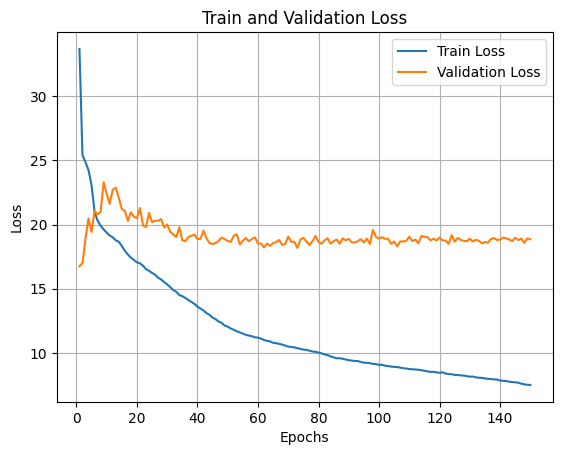

In [16]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [13]:
model.save('lstm-1.keras') # val_loss: 17.8839, epoch 27

In [77]:
model = keras.models.load_model('lstm-1.keras')

In [9]:
trainPredict = model.predict(X_train).reshape(y_train.shape)
testPredict = model.predict(X_test).reshape(y_test.shape)

4941/4941 [==============================] - 46s 9ms/step


In [10]:
training_mae = mean_absolute_error(y_train, trainPredict)
test_mae = mean_absolute_error(y_test, testPredict)
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 8.91
Test MAE: 38.72


In [11]:
training_mape = mean_absolute_percentage_error(y_train, trainPredict)
test_mape = mean_absolute_percentage_error(y_test, testPredict)
print(f"\n\nTraining MAPE: {round(training_mape, 4)*100} %")
print(f"Test MAPE: {round(test_mape, 4) *100} %")



Training MAPE: 3.34 %
Test MAPE: 22.88 %


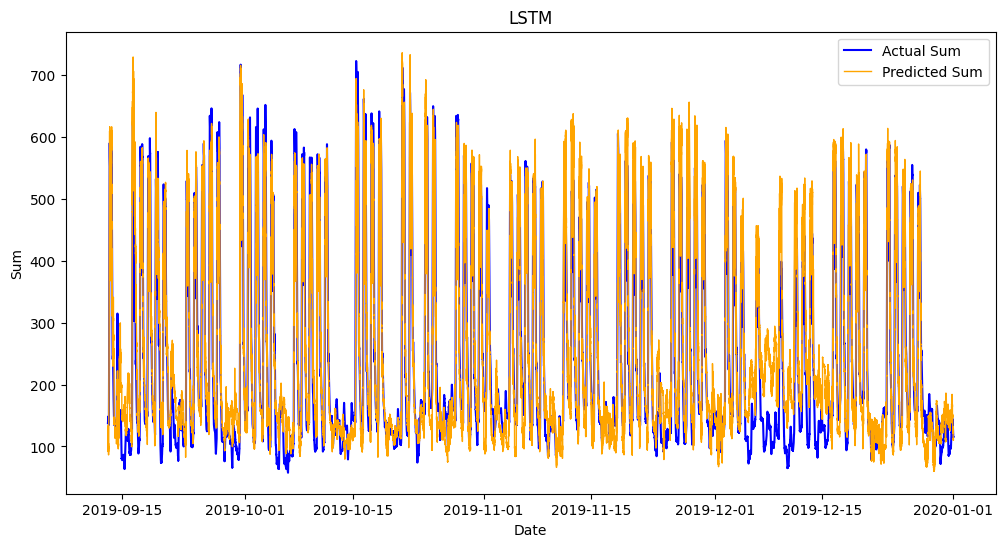

In [12]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[cutoff:].index, y_test, color='blue', label='Actual Sum')
plt.plot(X[cutoff:].index, testPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('LSTM')
plt.legend()
plt.show()

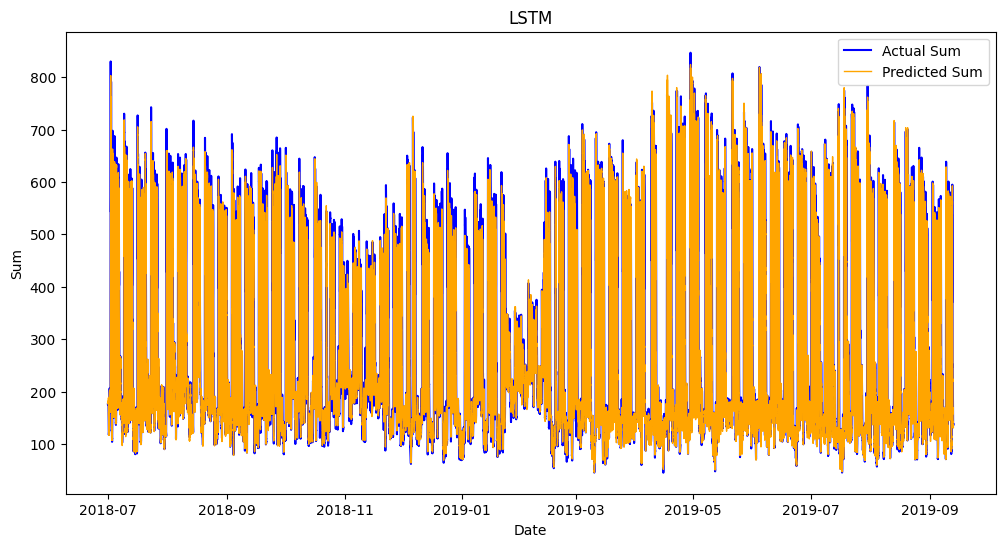

In [13]:
cutoff = int(len(X) * 0.8)
plt.figure(figsize=(12, 6))
plt.plot(X[:cutoff].index, y_train, color='blue', label='Actual Sum')
plt.plot(X[:cutoff].index, trainPredict, color='orange', linewidth=1, label='Predicted Sum')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('LSTM')
plt.legend()
plt.show()